In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("TSLA.csv")

In [3]:
data

Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1     17187100  
2      8218800  
3      5139800  
4      6866900  
...        ...  
2411  11788500  
2412  17801500  
2413  29005700  
2414  15719300  
2415  47065000  

[2416 rows x 7 columns]

In [4]:
df = data["Close"]
df.shape

(2416,)

In [5]:
print(df.head()) 

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64


In [6]:
print(df.tail())

2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, dtype: float64


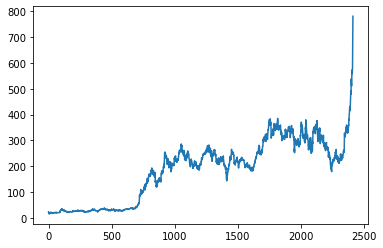

In [7]:
plt.plot(df)

In [8]:
#scaling the values using min max scaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
#data splitting 
train_size = int(len(df)*0.65)
test_size = int(len(df))-train_size
train_data,test_data = df[0:train_size:,:] , df[train_size:len(df),:]

In [10]:
train_size, test_size,df.size


(1570, 846, 2416)

In [11]:
print(train_data.shape) , print(test_data.shape)

(1570, 1)
(846, 1)


(None, None)

In [12]:
def create_dataset(dataset , time_step):
    dataX,dataY = [] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:i+(time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX) , np.array(dataY)

In [13]:
time_step = 100
X_train , Y_train = create_dataset(train_data,time_step)
X_test , Y_test = create_dataset(test_data,time_step)


In [14]:
print(X_train.shape), print(Y_train.shape)

(1469, 100)
(1469,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [16]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
23/23 [==============================] - 5s 217ms/step - loss: 1.8062e-04 - val_loss: 0.0020
Epoch 2/50
23/23 [==============================] - 5s 221ms/step - loss: 1.6633e-04 - val_loss: 0.0021
Epoch 3/50
23/23 [==============================] - 5s 214ms/step - loss: 1.6914e-04 - val_loss: 0.0023
Epoch 4/50
23/23 [==============================] - 5s 239ms/step - loss: 1.7333e-04 - val_loss: 0.0018
Epoch 5/50
23/23 [==============================] - 5s 227ms/step - loss: 1.5456e-04 - val_loss: 0.0026
Epoch 6/50
23/23 [==============================] - 5s 221ms/step - loss: 1.5636e-04 - val_loss: 0.0020
Epoch 7/50
23/23 [==============================] - 5s 238ms/step - loss: 1.6316e-04 - val_loss: 0.0019
Epoch 8/50
23/23 [==============================] - 7s 294ms/step - loss: 1.5323e-04 - val_loss: 0.0016
Epoch 9/50
23/23 [==============================] - 4s 165ms/step - loss: 1.4295e-04 - val_loss: 0.0017
Epoch 10/50
23/23 [==============================] - 4s 168ms/st

In [54]:
import tensorflow as tf

In [55]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [56]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [57]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

163.35427096457292

In [58]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

307.5108652889966

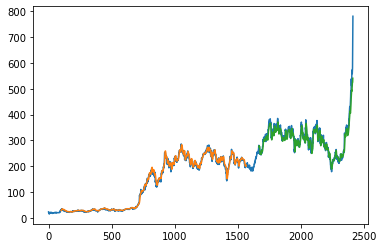

In [59]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
len(test_data)

846

In [61]:
x_input=test_data[746:].reshape(1,-1)
x_input.shape

(1, 100)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
temp_input

[0.3026694661083486,
 0.30105992541219573,
 0.3001831941900026,
 0.2970557419523685,
 0.2996466801884323,
 0.2979455705312745,
 0.30201518712378955,
 0.29418999607432605,
 0.29498821774404604,
 0.27140801753467675,
 0.27859198769955507,
 0.296728602460089,
 0.296165931693274,
 0.2945171355666056,
 0.2995158361685422,
 0.29747448966239204,
 0.2842580463229521,
 0.2821643457210154,
 0.2903951858152316,
 0.29344412850039253,
 0.29930646296780944,
 0.29958126799267204,
 0.303703217744046,
 0.31557182805548284,
 0.3167888183721539,
 0.3192227165663439,
 0.3221277165663439,
 0.315558769955509,
 0.31104422925935615,
 0.3137660324522376,
 0.31258831850300967,
 0.37147342711332115,
 0.4087019170374247,
 0.4081523043705836,
 0.3931169863909971,
 0.391533643025386,
 0.39141587673383926,
 0.3893090787751897,
 0.39475268385239465,
 0.3944255443601152,
 0.40667362863124834,
 0.41839833682282124,
 0.4204920374247579,
 0.43089504841664483,
 0.43722846506150226,
 0.4322297631510076,
 0.4364695184506673

In [64]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.77394384]
101
1 day input [0.30105993 0.30018319 0.29705574 0.29964668 0.29794557 0.30201519
 0.29419    0.29498822 0.27140802 0.27859199 0.2967286  0.29616593
 0.29451714 0.29951584 0.29747449 0.28425805 0.28216435 0.29039519
 0.29344413 0.29930646 0.29958127 0.30370322 0.31557183 0.31678882
 0.31922272 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832
 0.37147343 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588
 0.38930908 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204
 0.43089505 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697
 0.44977753 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569
 0.41283697 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307
 0.41885634 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889
 0.47853965 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846
 0.53578906 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495
 0.55902906 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177
 0.6661345  0.68322426 0.65781209

10 day output [[0.51293665]]
11 day input [0.2967286  0.29616593 0.29451714 0.29951584 0.29747449 0.28425805
 0.28216435 0.29039519 0.29344413 0.29930646 0.29958127 0.30370322
 0.31557183 0.31678882 0.31922272 0.32212772 0.31555877 0.31104423
 0.31376603 0.31258832 0.37147343 0.40870192 0.4081523  0.39311699
 0.39153364 0.39141588 0.38930908 0.39475268 0.39442554 0.40667363
 0.41839834 0.42049204 0.43089505 0.43722847 0.43222976 0.43646952
 0.44015966 0.43730697 0.44977753 0.44022507 0.44364039 0.41512694
 0.41944517 0.40973569 0.41283697 0.4110704  0.41752158 0.41926199
 0.41511384 0.41163307 0.41885634 0.42361947 0.43580214 0.4408532
 0.44998691 0.44829889 0.47853965 0.47525516 0.49378434 0.50803456
 0.51006281 0.52789846 0.53578906 0.54323476 0.54250197 0.52198379
 0.52673382 0.54234495 0.55902906 0.57019106 0.59311698 0.62331852
 0.60918607 0.60501177 0.6661345  0.68322426 0.65781209 0.6512562
 0.64734363 0.69536772 0.72462706 0.72808167 0.71842451 0.70952633
 0.72114633 0.73958387

19 day output [[0.40551955]]
20 day input [0.29930646 0.29958127 0.30370322 0.31557183 0.31678882 0.31922272
 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832 0.37147343
 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588 0.38930908
 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204 0.43089505
 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697 0.44977753
 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569 0.41283697
 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307 0.41885634
 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889 0.47853965
 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846 0.53578906
 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495 0.55902906
 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177 0.6661345
 0.68322426 0.65781209 0.6512562  0.64734363 0.69536772 0.72462706
 0.72808167 0.71842451 0.70952633 0.72114633 0.73958387 0.81786181
 0.83063335 1.         0.77394384 0.79206234 0.77879918 0.7492491
 0.71311903 0.67528659

29 day output [[0.36946738]]
[[0.7739438414573669], [0.7920623421669006], [0.7787991762161255], [0.7492491006851196], [0.7131190299987793], [0.675286591053009], [0.638007640838623], [0.6024506688117981], [0.569394588470459], [0.539425790309906], [0.5129366517066956], [0.49009162187576294], [0.4708263874053955], [0.4548853933811188], [0.4418853521347046], [0.43137696385383606], [0.42289918661117554], [0.4160149097442627], [0.41033312678337097], [0.4055195450782776], [0.4013001024723053], [0.3974592983722687], [0.39383649826049805], [0.3903190493583679], [0.386836975812912], [0.3833535313606262], [0.3798595070838928], [0.3763643503189087], [0.3728905916213989], [0.3694673776626587]]


In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [66]:
import matplotlib.pyplot as plt

In [67]:
len(df)

2416

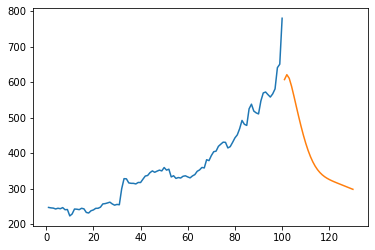

In [68]:
plt.plot(day_new,scaler.inverse_transform(df[2316:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

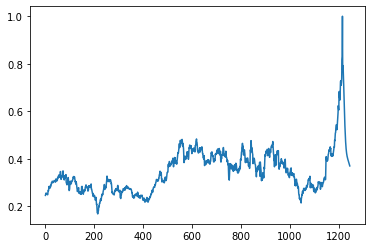

In [69]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [71]:
df3=scaler.inverse_transform(df3).tolist()

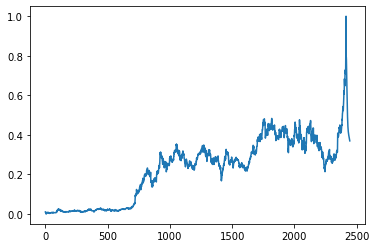

In [70]:
plt.plot(df3)